# Исследование рекламных метрик приложения 

### Содержание 

* [Описание данных](#id_1)  
* [Импорт библиотек](#id_2)  
* [Загрузка файлов](#id_3)  
* [Преодобработка](#id_4)  
  * [Исправление имен колонок](#id_4a)    
  * [Поиск дубликатов](#id_4b)  
  * [Изменение типов данных](#id_4c)  
* [Функции для работы](#id_5)  
 * [get_profiles()](#id_5a)  
 * [group_by_dimensions()](#id_5b)  
 * [get_retention()](#id_5c)  
 * [get_convertion()](#id_5d)  
 * [get_ltv()](#id_5e)  
 * [filter_data(), plot_ltv_roi()](#id_5f)  
 * [plot_conversion()](#id_5g)  
 * [plot_retention()](#id_5h)
* [Анализ данных](#id_6)  
 * [Создание таблицы профилей](#id_6a)  
 * [Распределение пользователей по странам](#id_6b)  
 * [Разбиение пользователей по устройствам](#id_6c)  
 * [Разбиение пользователей по каналам](#id_6d)  
* [Маркетинг](#id_7)  
 * [Общие расходы на маркетинг](#id_7a)    
 * [Диаграмма изменения во времени](#id_7b)  
 * [Стоимость привлечения одного покупателя](#id_7c)    
* [Оценка окупаемости рекламы](#id_8)  
 * [LTV,CaC И ROI](#id_8a)  
 * [Конверсия](#id_8b) 
 * [Удержание](#id_8c)  
 * [Выводы по рекламе](#id_8d)  
* [Вариант без TipTop](#id_9)  
* [ Исследование каналов FaceBoom и AdNonSense](#id_10)
* [Выводы](#id_100)
 



<strong>Цель проекта:</strong>изучить данные приложения "Procrastinate Pro+" и ответить на следующие вопросы:  
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

## Описание данных <a class="anchor" id="id_1"></a> 

В вашем распоряжении три датасета.   
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.  
<strong>Структура visits_info_short.csv:</strong>  
User Id — уникальный идентификатор пользователя,  
Region — страна пользователя,  
Device — тип устройства пользователя,  
Channel — идентификатор источника перехода,  
Session Start — дата и время начала сессии,  
Session End — дата и время окончания сессии.  
<strong>Структура orders_info_short.csv:</strong>  
User Id — уникальный идентификатор пользователя,  
Event Dt — дата и время покупки,  
Revenue — сумма заказа.  
<strong>Структура costs_info_short.csv: </strong> 
dt — дата проведения рекламной кампании,  
Channel — идентификатор рекламного источника,  
costs — расходы на эту кампанию.  

## Библиотеки <a class="anchor" id="id_2"></a>

In [988]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
%matplotlib inline
import random
import warnings
warnings.simplefilter("ignore", ResourceWarning)
warnings.simplefilter("ignore", FutureWarning)

## Файлы <a class="anchor" id="id_3"></a>

In [989]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')


## Предобработка <a class="anchor" id="id_4"></a>

In [990]:
display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [991]:
print(visits.info(),'\n','-'*50)
print(orders.info(),'\n','-'*50)
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None 
 --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None 
 --------------------------------------------------
<cla

Пропущенных значений нет, временные колонки используют тип данных string.

### Приведение имен колонок в порядок <a class="anchor" id="id_4a"></a> 

Приведение всех имен колонок к нижнему регистру, а также замена пробелов на '_':

In [992]:
def column_name_formatter (name):
    tmp = name.split(' ')
    new_name = "_".join([name_part for name_part in tmp] ).lower()
    return new_name

In [993]:
dfs = [visits,orders,costs]
for df in dfs:    
    df.columns = map(column_name_formatter, df.columns)
    print(df.columns.values)

['user_id' 'region' 'device' 'channel' 'session_start' 'session_end']
['user_id' 'event_dt' 'revenue']
['dt' 'channel' 'costs']


### Поиск дубликатов <a class="anchor" id="id_4b"></a>

In [994]:
for df in dfs: 
    print(df.duplicated().sum())

0
0
0


Полные дубликаты не обнаружены

### Изменение типа данных в колонках <a class="anchor" id="id_4c"></a>

In [995]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders['dt'] = pd.to_datetime(orders['event_dt']).dt.date
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

## Функции для анализа <a class="anchor" id="id_5"></a>

### Функция get_profiles() <a class="anchor" id="id_5a"></a>

In [996]:
def get_profiles(sessions, orders, ad_costs,events=None, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция group_by_dimensions() <a class="anchor" id="id_5b"></a>

In [997]:
def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

### Функция Get_retention() <a class="anchor" id="id_5c"></a>

In [998]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция Get_conversion() <a class="anchor" id="id_5d"></a>

In [999]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция Get_ltv() <a class="anchor" id="id_5e"></a>

In [1000]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функции Filter_data(), plot_ltv_roi() <a class="anchor" id="id_5f"></a>

In [1001]:
# функция для сглаживания датафрейма
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    plt.legend()    
    #________________
    
    #________________
    plt.tight_layout()
    plt.show()

###  Функция plot_conversion() <a class="anchor" id="id_5g"></a>

In [1002]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    ax1.legend(loc=2, prop={'size': 7})

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    ax2.legend(loc=2, prop={'size': 7})
    plt.tight_layout()
    plt.show()

### Plot_retention() <a class="anchor" id="id_5h"></a>

In [1003]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

## Анализ данных <a class="anchor" id="id_6"></a>

### Создание таблицы профилей <a class="anchor" id="id_6a"></a>

Построение таблицы профилей:


In [1004]:
profiles = get_profiles(sessions = visits, orders = orders, ad_costs=costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Минимальная и максимальная даты привлечения пользователей:

In [1005]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print(min_date,'\n',max_date)

2019-05-01 
 2019-10-27


### Построение диаграмм распределения пользователей по странам <a class="anchor" id="id_6b"></a>

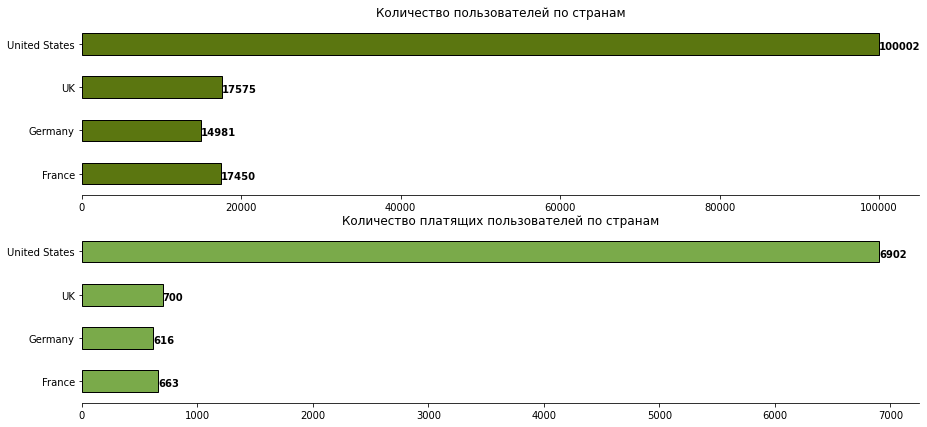

In [1006]:
plot_data_1 = profiles.groupby('region').agg({'user_id':'nunique'})
plot_data_2 = profiles.query('payer==True').groupby('region').agg({'user_id':'nunique'})
plots = [plot_data_1,plot_data_2]
titles = ['Количество пользователей по странам','Количество платящих пользователей по странам']
cols = 1
rows = 2
count = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,7))
for r in range(rows):                
            color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
            ax = plots[count].plot(
                kind='barh',ax=axes[r], edgecolor='black',  color = color, grid=False,
                title = titles[count], xlabel = '',legend=False)
            #Убирание рамок вложенных графиков           
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            #Нанесение надписей
            rects = axes[r].patches
            for index in range(len(rects)):
                width = rects[index].get_width()
                t = axes[r].text(width+0.1, rects[index].get_y()+0.2, str(round(width, 2)),
                          fontsize='medium', weight='bold', color='black',va='center',ha='left')
            count+=1
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Создание таблицы, отражающей  количество уникальных пользователей и долю платящих из каждой страны:

In [1007]:
print('Общий % тех, кто что-то купили: ' ,100*(6902+700+663+616)/150008)

Общий % тех, кто что-то купили:  5.920350914617887


In [1008]:
table_1 = profiles.pivot_table(index = 'region',
                               columns = 'payer',
                               values = 'user_id',
                               aggfunc = 'nunique').sort_values(by =1, ascending = False)
table_1['Всего'] = table_1.sum(axis = 1)

table_1.columns = ['Не платящие','Платящие','Всего уникальных пользователей']
table_1['Доля платящих,%'] = round(table_1['Платящие']/table_1['Всего уникальных пользователей']*100,2)
table_1['Доля страны в общей численности,%'] = round(
    table_1['Всего уникальных пользователей']/table_1['Всего уникальных пользователей'].sum()*100,2)
table_1.index.name = 'Страна'
print(table_1['Всего уникальных пользователей'].sum())
display(table_1)

150008


,Не платящие,Платящие,Всего уникальных пользователей,"Доля платящих,%","Доля страны в общей численности,%"
Страна,,,,,
United States,93100,6902,100002,6.90,66.66
UK,16875,700,17575,3.98,11.72
France,16787,663,17450,3.80,11.63
Germany,14365,616,14981,4.11,9.99


На рассматриваемый момент времени аудитория приложения составила 150008 человек.6% из нее что-то купили.
Пользователи из США составляют 67% от общей численности уникальных пользователей(150 008 человек). Из них 7% являются платящими. Жители Великобритании и Франции обладают похожими характеристиками, они составляют по 12% от общей численности и 4% из них являются платными. Немцы идут на последнем месте с показателями 10% и 4% соответственно.

### Разбиение пользователей по устройствам <a class="anchor" id="id_6c"></a>

In [1009]:
table_2 = profiles.pivot_table(index = 'device',columns = 'payer',values = 'user_id',aggfunc = 'nunique')
table_2['Всего'] = table_2.sum(axis = 1)
table_2.columns = ['Не платящие','Платящие','Всего уникальных пользователей']
table_2['Доля платящих,%'] = round(table_2['Платящие']/table_2['Всего уникальных пользователей']*100,2)
table_2['Доля устройств ,%'] = round(
    table_2['Всего уникальных пользователей']/table_2['Всего уникальных пользователей'].sum()*100,2)
table_2.index.name = 'Страна'
display(table_2.sort_values('Всего уникальных пользователей', ascending = False))

,Не платящие,Платящие,Всего уникальных пользователей,"Доля платящих,%","Доля устройств ,%"
Страна,,,,,
iPhone,51097,3382,54479,6.21,36.32
Android,32982,2050,35032,5.85,23.35
PC,28918,1537,30455,5.05,20.30
Mac,28130,1912,30042,6.36,20.03


Проверка на то, приходится ли несколько устройств на одного пользователя:

In [1010]:
table_3 = profiles.pivot_table(index = 'user_id',values = 'device',aggfunc = 'count').sort_values('device', ascending=False)
display(table_3.head())

,device
user_id,
599326,1
666759952851,1
666659346581,1
666668897965,1
666669076670,1


Одному пользователю соответствует одно устройство. Больше всего пользователей айфонов (54479 или 36% от общего числа), затем идут пользователи на Android(35032 и 23% соотв.). Пользователей PC и макбуков примерно одинаково (30тыс или 20% от общего числа). По доле платящих лидируют посетители на макбуках и айфонах (6.3% и 6.2%), затем на Android и PC(5.8% и 5%).

### Разбиение пользователей по каналам <a class="anchor" id="id_6d"></a>

In [1011]:
table_4 = profiles.pivot_table(index = 'channel',columns = 'payer',values = 'user_id',aggfunc = 'nunique')
table_4['Всего'] = table_4.sum(axis = 1)
table_4.columns = ['Не платящие','Платящие','Всего уникальных пользователей']
table_4['Доля платящих,%'] = round(table_4['Платящие']/table_4['Всего уникальных пользователей']*100,2)
table_4['Доля канала ,%'] = round(
    table_4['Всего уникальных пользователей']/table_4['Всего уникальных пользователей'].sum()*100,2)
table_4.index.name = 'Страна'
display(table_4.sort_values('Платящие', ascending = False))
print(table_4['Доля платящих,%'].mean())

,Не платящие,Платящие,Всего уникальных пользователей,"Доля платящих,%","Доля канала ,%"
Страна,,,,,
FaceBoom,25587,3557,29144,12.20,19.43
TipTop,17683,1878,19561,9.60,13.04
organic,55279,1160,56439,2.06,37.62
WahooNetBanner,8100,453,8553,5.30,5.70
AdNonSense,3440,440,3880,11.34,2.59
RocketSuperAds,4096,352,4448,7.91,2.97
LeapBob,8291,262,8553,3.06,5.70
OppleCreativeMedia,8372,233,8605,2.71,5.74
lambdaMediaAds,1924,225,2149,10.47,1.43


6.55


Больше всего платящих уникальных пользователей пришло из канала FaceBoom (3557 человек), TipTop (1878 человек) и сами из канала Organic (1160 человек). По доле платящих пользователей из численности канала лидируют FaceBoom (12.2%), AdNonSense(11.34%) и lambdaMediaAds(10.47%).На последнем месте пользователи из Organic (2%). Средний процент доли платежеспособной аудитории составляет 6.55%.

## Маркетинг <a class="anchor" id="id_7"></a>

### Общие расходы на маркетинг <a class="anchor" id="id_7a"></a>

In [1012]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month_name()
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
table_5 = costs.pivot_table(
    index = 'channel',
    columns = ['month'],
    values = 'costs',
    aggfunc = 'sum')
cols = table_5.columns.tolist()
cols = [cols[3],cols[2],cols[1],cols[0],cols[5],cols[4]]
table_5 = table_5[cols]

Отформатируем датафрейм для таблички:

In [1013]:
table_5a = table_5.copy()
table_5a['Всего по каналу'] = table_5a.sum(axis = 1)
table_5a['% от всех расходов'] = round(table_5a['Всего по каналу']/table_5a['Всего по каналу'].sum()*100,2)
table_5a = table_5a.sort_values('Всего по каналу',ascending = False)
table_5a.loc[len(table_5a.index)] = table_5a.sum()
table_5a = table_5a.rename(index = {10:'Всего за месяц'})

In [1014]:
display(table_5a)

month,May,June,July,August,September,October,Всего по каналу,% от всех расходов
channel,,,,,,,,
TipTop,2981.00,6675.600,8410.20,11202.00,13232.50,12250.000,54751.30,51.90
FaceBoom,3524.40,5501.100,5294.30,6274.40,6114.90,5736.500,32445.60,30.75
WahooNetBanner,418.80,921.000,851.40,1040.40,977.40,942.000,5151.00,4.88
AdNonSense,1169.70,538.650,504.00,579.60,581.70,537.600,3911.25,3.71
OppleCreativeMedia,169.75,370.000,366.50,439.25,427.75,378.000,2151.25,2.04
RocketSuperAds,577.98,325.715,252.07,253.11,218.40,205.725,1833.00,1.74
LeapBob,140.28,314.580,313.53,369.81,343.98,315.420,1797.60,1.70
lambdaMediaAds,458.40,199.200,219.20,220.00,247.20,213.600,1557.60,1.48
MediaTornado,238.56,138.000,138.48,154.56,144.72,140.160,954.48,0.90


In [1015]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
table_6 = costs.pivot_table(
    index = 'channel',
    columns = ['month','week'],
    values = 'costs',
    aggfunc = 'sum')
display(table_6)

month                   5                                        6            \
week                    18      19      20      21      22       22       23   
channel                                                                        
AdNonSense          211.05  273.00  265.65  266.70  153.30   49.350   102.90   
FaceBoom            535.70  750.20  755.70  722.70  760.10  448.800  1081.30   
LeapBob              16.80   31.71   26.67   26.67   38.43   27.090    66.99   
MediaTornado         38.64   61.68   59.04   50.16   29.04    7.920    27.60   
OppleCreativeMedia   24.00   34.50   27.50   34.25   49.50   32.250    79.50   
RocketSuperAds       99.45  139.23  138.06  131.04   70.20   27.495    76.05   
TipTop              347.00  470.00  454.00  801.80  908.20  513.000  1223.60   
WahooNetBanner       49.20   92.40   90.00   79.20  108.00   71.400   196.80   
YRabbit              52.20   75.90   69.30   65.40   36.90   12.900    25.80   
lambdaMediaAds       81.60  103.20   90.40  119.20   64.00   19.200    35.20   

month                                          ...       9             \
week                     24       25       26  ...       35        36   
channel                                        ...                      
AdNonSense            96.60   141.75   148.05  ...   21.000   100.800   
FaceBoom            1042.80  1280.40  1647.80  ...  221.100  1151.700   
LeapBob               52.29    68.46    99.75  ...   11.970    66.990   
MediaTornado          29.76    32.16    40.56  ...    4.800    30.240   
OppleCreativeMedia    71.50    79.75   107.00  ...   16.250    72.750   
RocketSuperAds        63.18    80.73    78.26  ...    7.475    40.625   
TipTop              1121.00  1474.40  2343.60  ...  390.000  2563.000   
WahooNetBanner       166.20   201.60   285.00  ...   36.000   174.600   
YRabbit               17.46    22.14    27.90  ...    2.940    27.930   
lambdaMediaAds        45.60    40.00    59.20  ...    8.800    52.000   

month                                                          10            \
week                     37        38       39       40        40        41   
channel                                                                       
AdNonSense           100.80   139.650   192.15   27.300   128.100   136.500   
FaceBoom            1148.40  1496.000  1837.00  260.700  1500.400  1392.600   
LeapBob               63.84    81.270   101.22   18.690    82.320    78.960   
MediaTornado          25.92    30.240    48.24    5.280    36.720    36.960   
OppleCreativeMedia    78.00   105.750   132.25   22.750   100.250    88.250   
RocketSuperAds        40.95    56.225    63.70    9.425    56.875    51.675   
TipTop              2506.00  3241.000  3979.50  553.000  3150.000  3097.500   
WahooNetBanner       192.60   226.200   303.00   45.000   264.000   208.800   
YRabbit               29.76    39.600    47.52    5.040    40.320    38.310   
lambdaMediaAds        41.60    57.600    80.00    7.200    52.000    60.800   

month                                  
week                      42       43  
channel                                
AdNonSense           118.650   154.35  
FaceBoom            1291.400  1552.10  
LeapBob               69.720    84.42  
MediaTornado          29.040    37.44  
OppleCreativeMedia    88.000   101.50  
RocketSuperAds        46.475    50.70  
TipTop              2737.000  3265.50  
WahooNetBanner       216.000   253.20  
YRabbit               36.450    48.33  
lambdaMediaAds        47.200    53.60  

[10 rows x 30 columns]

Общие расходы на маркетинг за весь период составили  105497.3 в денежном выражении. Больше всего потратили на каналы TipTop (52% от общей суммы) и Faceboom (30.75%). Доля остальных каналов не превышает 5% для каждого.

### Диаграммы изменения расходов по неделям и месяцам <a class="anchor" id="id_7b"></a>

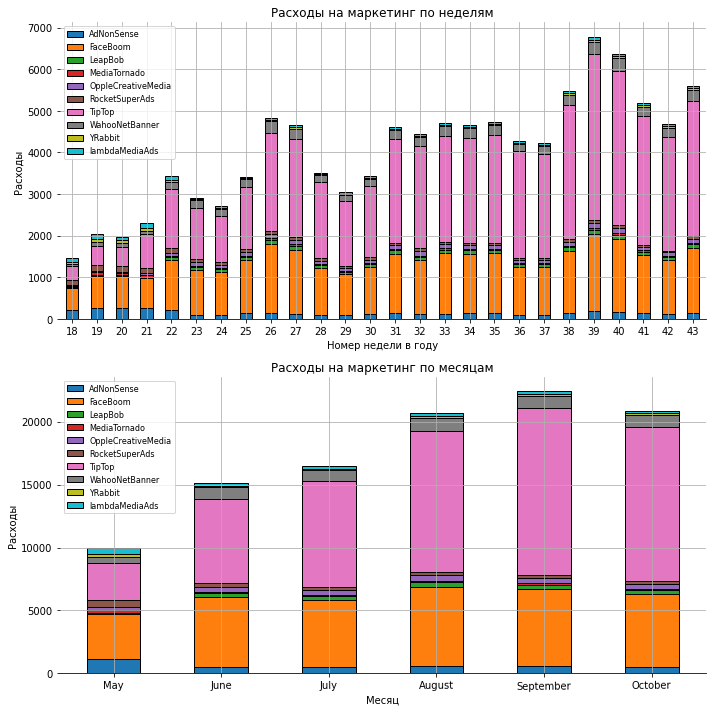

In [1016]:
plot_data_3 = costs.pivot_table(index = 'channel',
                                          columns = 'week',
                                          values = 'costs',
                                          aggfunc = 'sum').T
plot_data_4 = table_5.T
plots = [plot_data_3,plot_data_4]
titles = ['Расходы на маркетинг по неделям','Расходы на маркетинг по месяцам']
x_names = ['Номер недели в году','Месяц'] #список подписей к оси Х
cols = 1
rows = 2
count = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10,10))
for r in range(rows):                
            ax = plots[count].plot(
                kind='bar',stacked = True,ax=axes[r], edgecolor='black', grid=True,
                title = titles[count],
                ylabel = 'Расходы',
                xlabel = x_names[count],rot = 0.45)
            #Убирание рамок вложенных графиков           
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.legend(loc=2, prop={'size': 8}) #позиционирование окошка легенды и ее размер
            count+=1
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.tight_layout()
plt.show()

### Расчет CaC для каждого канала <a class="anchor" id="id_7c"></a>

In [1017]:
table_7 = round(profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(
    by ='acquisition_cost' , ascending = False),2)
table_7.loc[len(table_5a.index)] = table_7.mean()
table_7 = table_7.rename(index = {11:'Среднее значение'})
display(table_7)

,acquisition_cost
channel,
TipTop,2.800000
FaceBoom,1.110000
AdNonSense,1.010000
lambdaMediaAds,0.720000
WahooNetBanner,0.600000
RocketSuperAds,0.410000
OppleCreativeMedia,0.250000
YRabbit,0.220000
MediaTornado,0.220000


Расходы постепенно возрастают от минимального значения в мае (9978.57) и достигают пика в сентябре (22441.34) с небольшим снижением к концу октября. Прирост идет в основном за счет каналов TipTop и WahooNetBanner. Стоимость посетителей из канала TipTop самая большая (2.8 денежных единиц), что в 2.5 раза стоимости привлечения из ближайшего канала FaceBoom (1.11), с чем и связан рост расходов от месяца к месяцу.

##  Оценка окупаемости рекламы <a class="anchor" id="id_8"></a>

In [1018]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14                               # горизонт анализа 

Посчитаем, принесли ли доход пользователи из канала "organic":

In [1019]:
profiles_organic = profiles.query('channel=="organic"')
profiles_organic = profiles_organic.merge(orders[['revenue','user_id']],on = 'user_id',how = 'left')
revenue_organic = profiles_organic['revenue'].sum()
print('Доход c бесплатных пользователей: ',revenue_organic)


Доход c бесплатных пользователей:  46627.23


Тогда  общие затраты и суммарный доход по рекламе с исключением бесплатных пользователей составят: 

In [1020]:
total_expenses = costs.query('dt <= @observation_date')['costs'].sum()
total_revenue = orders.query('dt <= @observation_date')['revenue'].sum() - revenue_organic
print(total_expenses,total_revenue)

105497.30000000002 169335.65


RoI:

In [1021]:
print(total_revenue/total_expenses)

1.6051183300425695


Исключим канал "organic" из расчетов показателей рекламы:

In [1022]:
profiles = profiles[profiles['channel']!='organic']

### LTV, ROI, CaC и их динамика <a class="anchor" id="id_8a"></a>

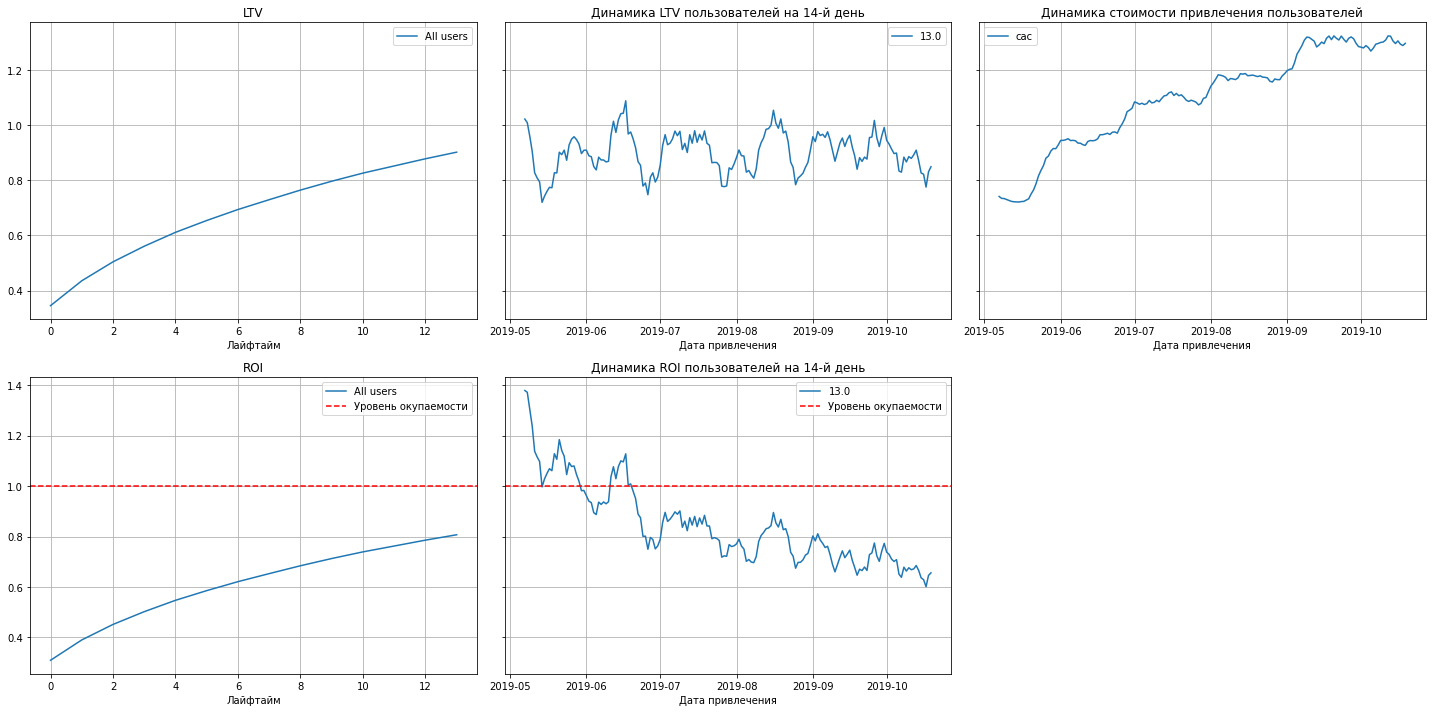

In [1023]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,ignore_horizon = False)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

In [1024]:
ltv_raw_base,ltv_grouped_base,ltv_history_base,roi_grouped_base,roi_history_base  = ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history

In [1025]:
display(roi_grouped_base)

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


Кривая LTV демонстрирует рост и к концу двухнедельного периода достигается отметка 0.9. График динамики LTV демонстрирует пик в середине июня, связанный с началом привлечения большого числа пользователей из канала TipTop и WahooNetBanner.Затем, компания в июле (примерно на 27 неделе) помогла поднять LTV и продержать его в течение половины месяца. В августе затраты на рекламу были на 25% больше июльских, что вызвало пик LTV, как в июне.  
Линия на графике CaC резко возрастает с июня, это связано с высокой стоимостью пользователей из канала TipTop. Соотвественно линия на графике динамики RoI с июня начинает стремительное пике вниз за черту безубыточности.
Показатель RoI к концу второй недели равен 0.8, то есть реклама себя не окупает.

### Конверсия по всем пользователям <a class="anchor" id="id_8b"></a>

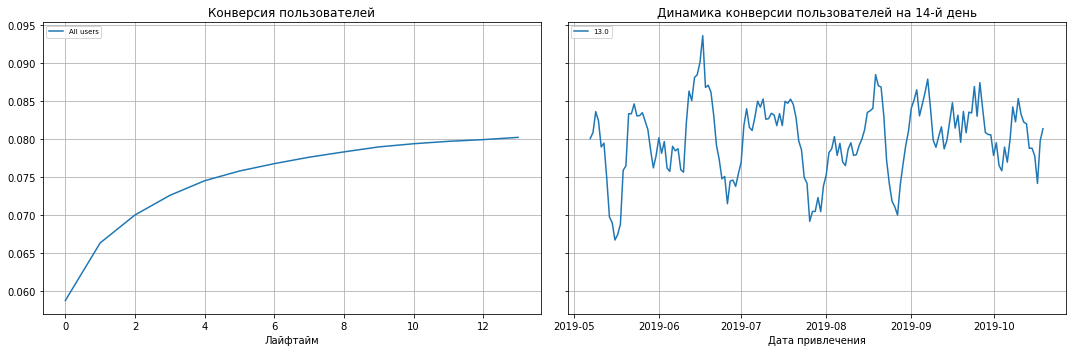

In [1026]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days ) 

Конверсия по каналам:

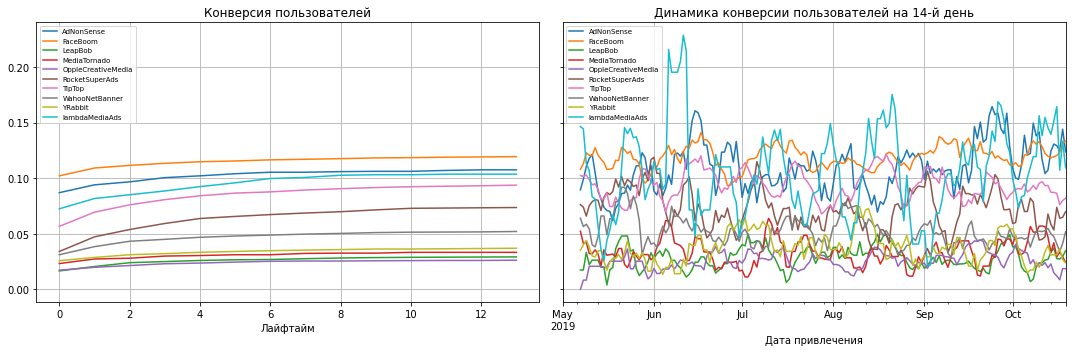

In [1027]:
conversion_raw_channel, conversion_grouped_channel, conversion_history_channel = get_conversion(
    profiles, orders, observation_date, horizon_days,dimensions = ['channel'])

plot_conversion(conversion_grouped_channel, conversion_history_channel, horizon_days ) 

Конверсии каналов на конец второй недели:

In [1028]:
print((conversion_grouped_channel[13]*100).sort_values(ascending = False))

channel
FaceBoom              11.937264
AdNonSense            10.750945
lambdaMediaAds        10.359922
TipTop                 9.373986
RocketSuperAds         7.362973
WahooNetBanner         5.209107
YRabbit                3.705510
MediaTornado           3.335733
LeapBob                2.924843
OppleCreativeMedia     2.629316
Name: 13.0, dtype: float64


Средний размер когорт по каналам за рассматриваемый период:

In [1029]:
print(round(conversion_history_channel.reset_index().
            groupby('channel')['cohort_size'].mean().sort_values(ascending=False),2))

channel
FaceBoom              160.14
TipTop                107.55
OppleCreativeMedia     47.32
LeapBob                47.11
WahooNetBanner         46.99
RocketSuperAds         24.72
MediaTornado           24.23
YRabbit                23.85
AdNonSense             21.52
lambdaMediaAds         11.95
Name: cohort_size, dtype: float64


Конверсия по устройствам:

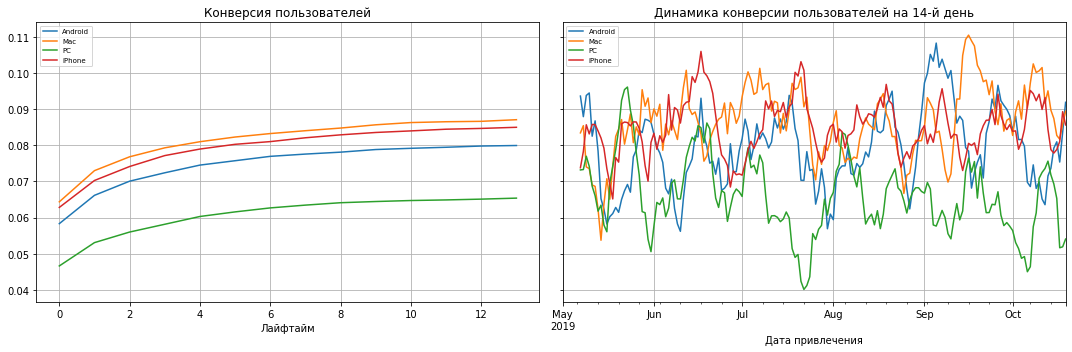

In [1030]:
conversion_raw_dev, conversion_grouped_dev, conversion_history_dev = get_conversion(
    profiles, orders, observation_date, horizon_days,dimensions = ['device'])

plot_conversion(conversion_grouped_dev, conversion_history_dev, horizon_days ) 

Конверсия по странам:

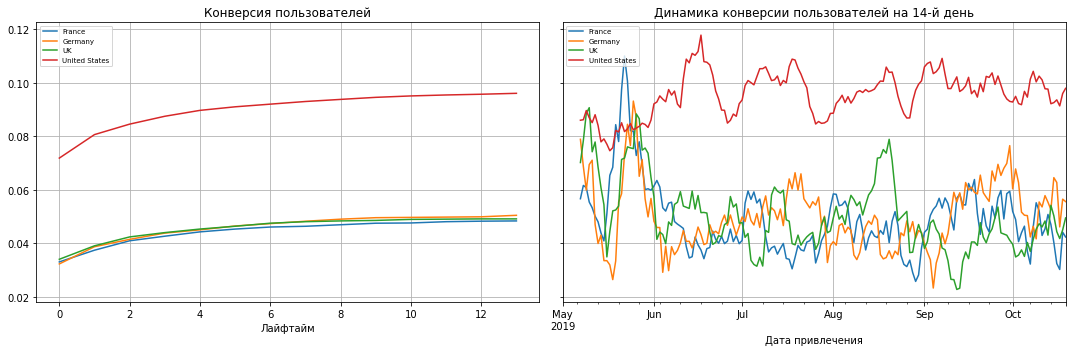

In [1031]:
conversion_raw_ctr, conversion_grouped_ctr, conversion_history_ctr = get_conversion(
    profiles, orders, observation_date, horizon_days,dimensions = ['region'])

plot_conversion(conversion_grouped_ctr, conversion_history_ctr, horizon_days ) 

In [1032]:
display(conversion_grouped_ctr[13]*100)

region
France           4.840243
Germany          5.049834
UK               4.916477
United States    9.606912
Name: 13.0, dtype: float64

Конверсия всех пользователей примерно 8%, что в принципе хорошо, если принять за аксиому, что только 5% пользователей конвертируются в клиентов.  
Лучше всего к концу 2й недели конвертируются пользователи из каналов FaceBoom, AdNonSense и LambdaMediaAds: их показатели конверсии соответственно 11.9%, 10.7%,10.3%. Меньше всего конверсия у каналов OppleCreativeMedia и LeapBob - меньше 3%.  
Форма линии динамики общей конверсии  совпадает с формой линии динамики на графике канала LamdaMediaAds: так как средний размер когорты всего 12 человек и доля его посетителей в общей численности по табличке в п.6.4 всего 1.43% при высоком проценте конверсии дают такую форму. Тоже самое можно сказать о канале AdNonSense, а каналы FaceBoom и TiPTop несколько сглаживают динамику.  
Конверсия пользователей PC на 14й день равна 0.65 несколько отстает от других платформ, у которых конверсия больше или равна 8%.  
В страновом разрезе, самая большая конверсия у жителей США(9.6%), у жителей Европы - около 5%.

### Удержание по всем пользователям <a class="anchor" id="id_8c"></a>

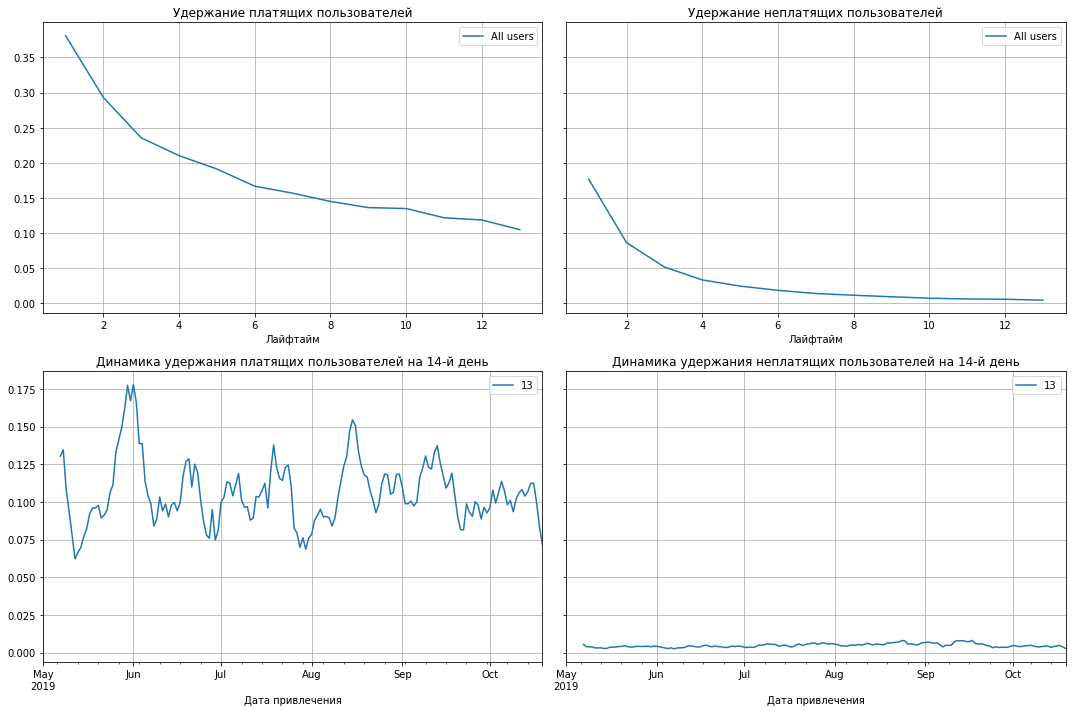

In [1033]:
retention_raw,retention,retention_history = get_retention(profiles,visits,observation_date,horizon_days)
plot_retention(retention, retention_history, horizon_days, window=7)

На второй день остается около 35% от первоначальной когорты,а к седьмому дню остается лишь 17% .  Удержание бесплатных пользователей очень маленькое и стремительно снижается уже к концу первой недели практически до нуля.

Удержание по каналам:

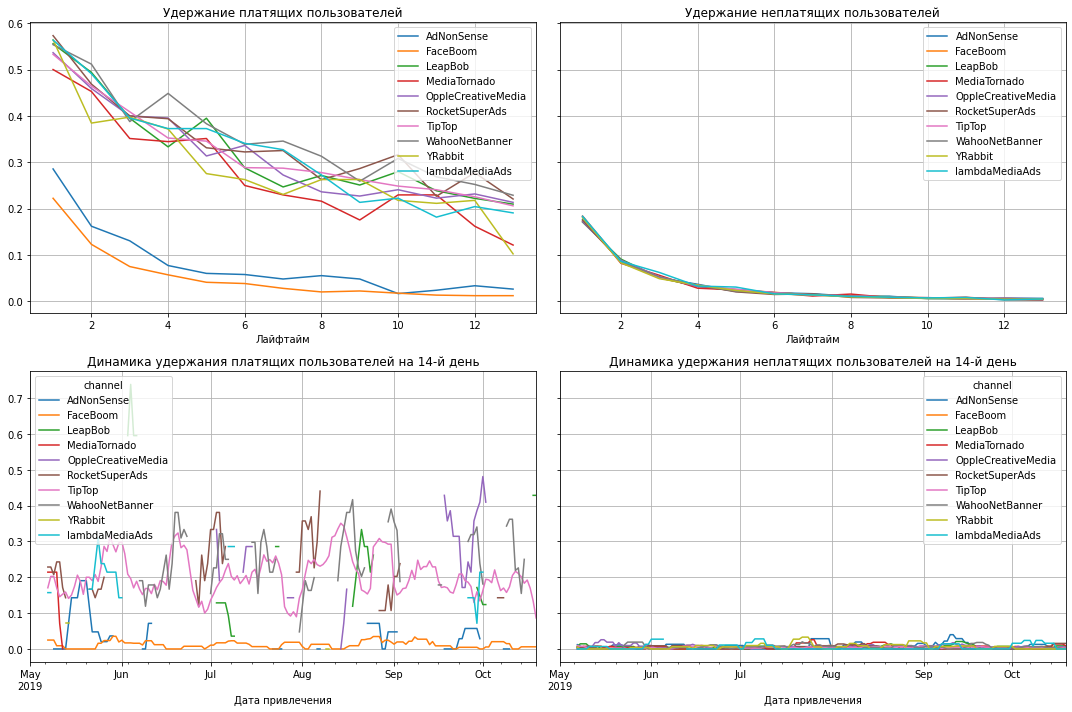

In [1034]:
retention_raw_channel,retention_channel,retention_history_channel = get_retention(
    profiles,visits,observation_date,horizon_days, dimensions = ['channel']
)
plot_retention(retention_channel, retention_history_channel, horizon_days, window=7)

Значения удержания на 2,7 и 14 день:

In [1035]:
display((retention_channel.query('payer==True')[[1,6,13]].sort_values(by= [13],ascending=False)*100))

1          6          13
payer channel                                            
True  WahooNetBanner      55.373832  33.878505  22.897196
      RocketSuperAds      57.313433  32.238806  22.089552
      OppleCreativeMedia  53.636364  33.636364  21.363636
      LeapBob             55.555556  28.806584  20.987654
      TipTop              53.277311  28.851541  20.616246
      lambdaMediaAds      56.363636  34.090909  19.090909
      MediaTornado        50.000000  25.000000  12.162162
      YRabbit             56.410256  26.282051  10.256410
      AdNonSense          28.571429   5.811138   2.663438
      FaceBoom            22.248662   3.866746   1.249256

Удержание по каналам FaceBoom и AdNoNSense  в каждый день двухнедельного периода меньше удержания остальных каналов:у FaceBoom второй день только заходят 22% пользователей, у второго - 28%, на 14й день - меньше 3%. Так как это каналы с высокой конверсией, это вызывает беспокойство.

Удержание по устройствам:

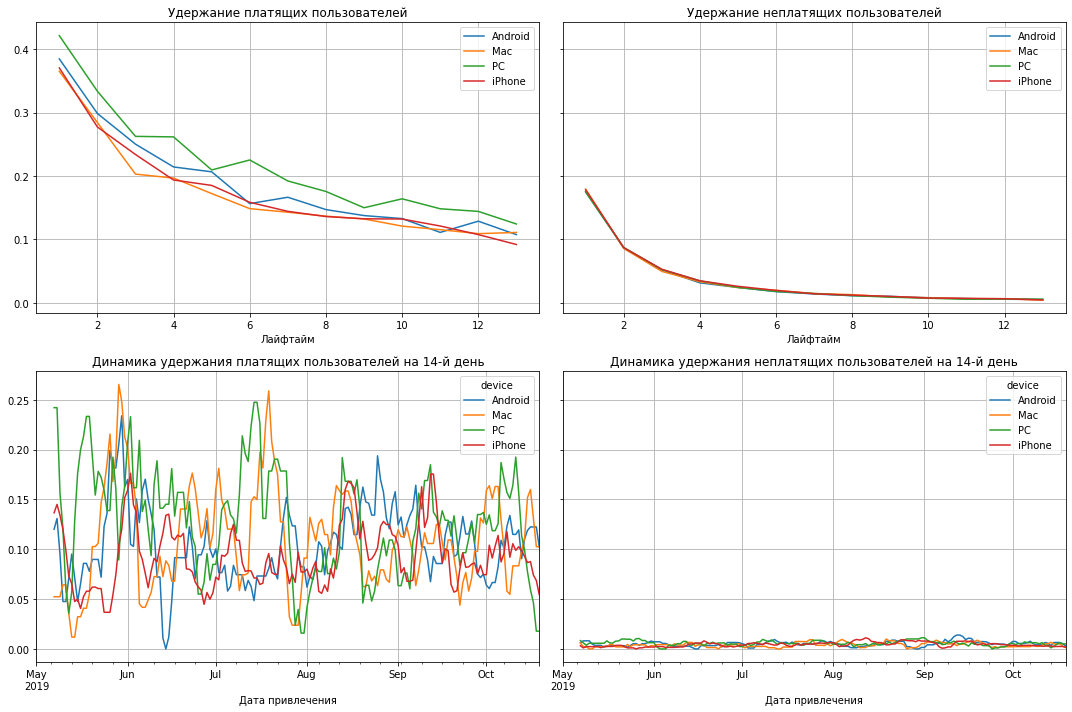

In [1036]:
retention_raw_dev,retention_dev,retention_history_dev = get_retention(
    profiles,visits,observation_date,horizon_days, dimensions = ['device']
)
plot_retention(retention_dev, retention_history_dev, horizon_days, window=7)

In [1037]:
display((retention_dev.query('payer==True')[[1,6,13]].sort_values(by= [13],ascending=False)*100))

1          6          13
payer device                                  
True  PC       42.135762  22.516556  12.417219
      Mac      36.505949  14.840326  11.083281
      Android  38.466077  15.634218  10.737463
      iPhone   37.046263  15.836299   9.181495

В разрезе устройств значения удержания в каждый день жизни пользователя явных аутсайдеров нет. У PC падение удержания несколько меньше. 

Удержание по странам:

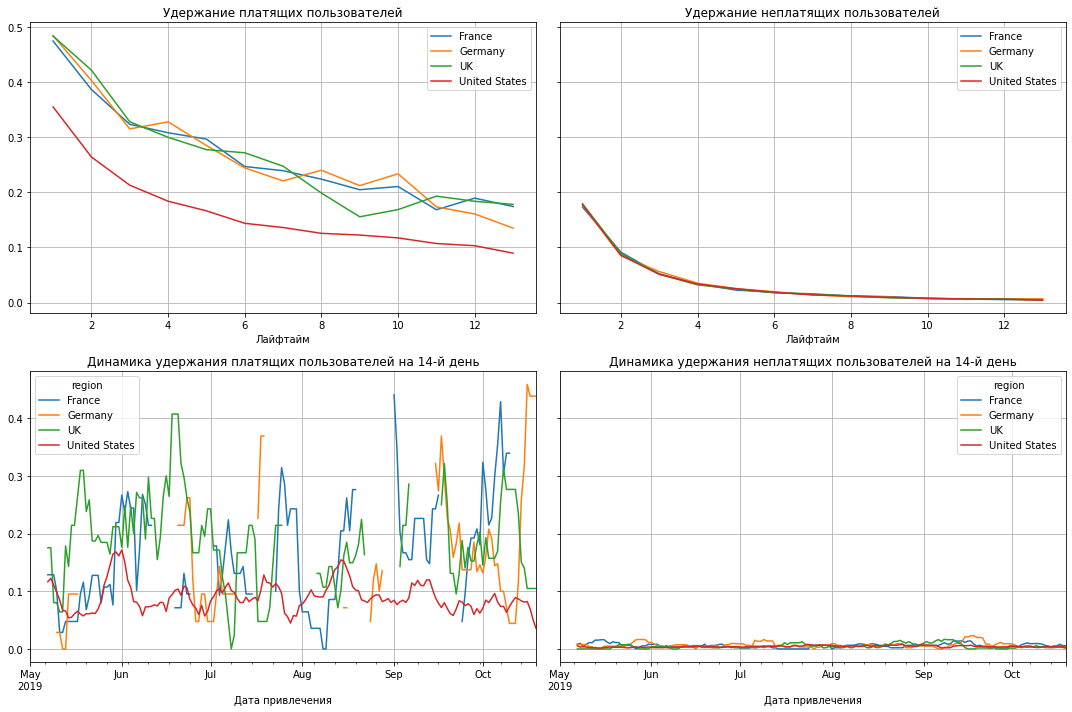

In [1038]:
retention_raw_ctr,retention_ctr,retention_history_ctr = get_retention(
    profiles,visits,observation_date,horizon_days, dimensions = ['region']
)
plot_retention(retention_ctr, retention_history_ctr, horizon_days, window=7)

In [1039]:
display((retention_ctr.query('payer==True')[[1,6,13]].sort_values(by= [13],ascending=False)*100))

1          6          13
payer region                                        
True  UK             48.314607  27.153558  17.790262
      France         47.418738  24.665392  17.399618
      Germany        48.394004  24.411135  13.490364
      United States  35.482198  14.362254   8.952644

На второй день остается около 40% от первоначальной когорты,а к седьмому дню остается лишь 17% .  Удержание бесплатных пользователей очень маленькое и стремительно снижается уже к концу первой недели практически до нуля.  
Удержание по каналам FaceBoom и AdNoNSense  в каждый день двухнедельного периода меньше удержания остальных каналов:у FaceBoom второй день только заходят 22% пользователей, у второго - 28%, на 14й день - меньше 3%. Так как это каналы с высокой конверсией, это вызывает беспокойство.  
В разрезе устройств явных аутсайдеров нет. У PC падение удержания несколько меньше. На 14 день показатель составляет от 9 до 12%.
По странам, удержание по США отстает от стран Европы. На 14й день больше всего у Великобритании и Франции (18 и 17%), затем у Германии(13%), у США 9%. 

###   Графики LTV и ROI, динамики LTV, CAC и ROI  с разбивкой по устройствам

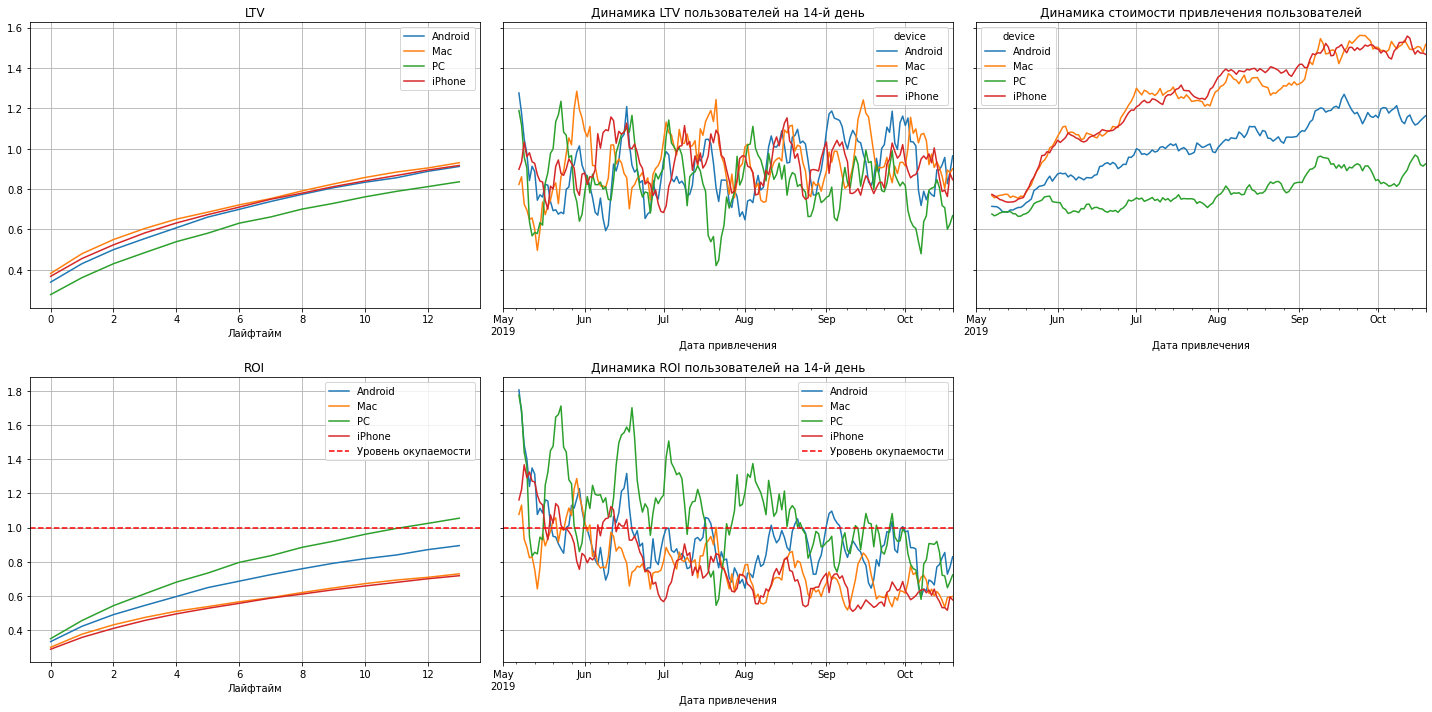

In [1040]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['device'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

In [1041]:
print("-"*20,'LTV',"-"*20)
display(ltv_grouped.rename_axis('lifetime',axis = 1)[[1,6,13]].rename(columns={
    1.0:'LTV 2 день',
    6.0:'LTV 7 день',
    13.0:'LTV 14 день'}).sort_values('LTV 14 день',ascending=False))
print("-"*20,'ROI',"-"*20)
display(roi_grouped.rename_axis('lifetime',axis = 1)[[1,6,13]].rename(columns={
    1.0:'ROI 2 день',
    6.0:'ROI 7 день',
    13.0:'ROI 14 день'}).sort_values('ROI 14 день',ascending=False))

-------------------- LTV --------------------


lifetime,LTV 2 день,LTV 7 день,LTV 14 день
device,,,
Mac,0.480219,0.721831,0.930541
iPhone,0.456307,0.710708,0.916983
Android,0.430766,0.699810,0.912098
PC,0.361536,0.631240,0.836167


-------------------- ROI --------------------


lifetime,ROI 2 день,ROI 7 день,ROI 14 день
device,,,
PC,0.456068,0.796291,1.054801
Android,0.422419,0.686250,0.894425
Mac,0.376283,0.565601,0.729139
iPhone,0.357321,0.556536,0.718064


Учитывая сегментацию пользователей по устройствам, кривые LTV ведут себя нормально, разве что LTV пользователей PC стабильно ниже, чем на других устройствах.К концу 14 дня их LTV  равняется чуть больше 0.8. У остальных устройств LTV достигает отметки 0.9.        
Бросается в глаза, что стоимость привлечения пользователей на устройствах Apple сильно выше, чем других, и растет к концу рассматриваемого периода. Из-за этого они даже не достигают отметки безубыточности к концу второй недели, ее достигают только посетители на компьютерах.   
Пользователи на Android также не окупают рекламу в двухнедельный срок и приносят убытки в размере 10% от затраченных средств.
Рост CaC для Mac и iPhone со второй половины июня привел к тому, что эти устройства стали убыточными.  

### Графики LTV и ROI, динамики LTV, CAC и ROI с разбивкой  по каналам

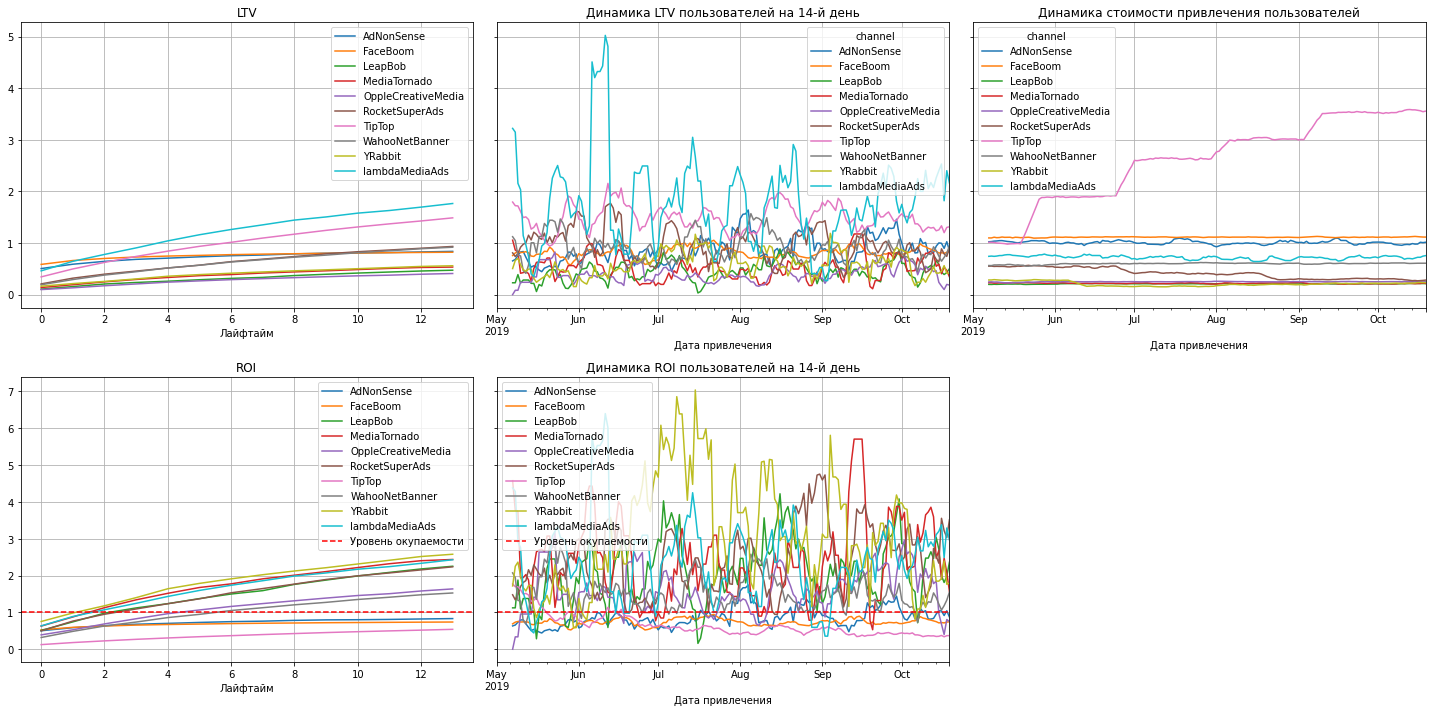

In [1042]:
ltv_raw_channel, ltv_grouped_channel, ltv_history_channel, roi_grouped_channel, roi_history_channel = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

# строим графики
plot_ltv_roi(ltv_grouped_channel, ltv_history_channel, roi_grouped_channel, roi_history_channel, horizon_days) 

In [1043]:
print("-"*20,'LTV',"-"*20)
ltv_grouped_channel = ltv_grouped_channel.rename_axis('lifetime',axis = 1)[[1,6,13]].rename(columns={
    1.0:'LTV 2 день',
    6.0:'LTV 7 день',
    13.0:'LTV 14 день'}).sort_values('LTV 14 день',ascending=False)
display(ltv_grouped_channel)
print("-"*20,'ROI',"-"*20)
roi_grouped_channel = roi_grouped_channel.rename_axis('lifetime',axis = 1)[[1,6,13]].rename(columns={
    1.0:'ROI 2 день',
    6.0:'ROI 7 день',
    13.0:'ROI 14 день'}).sort_values('ROI 14 день',ascending=False)
display(roi_grouped_channel)

-------------------- LTV --------------------


lifetime,LTV 2 день,LTV 7 день,LTV 14 день
channel,,,
lambdaMediaAds,0.645302,1.262369,1.766250
TipTop,0.497389,1.013676,1.487908
RocketSuperAds,0.318640,0.639125,0.933801
WahooNetBanner,0.291477,0.631870,0.918615
AdNonSense,0.589149,0.754149,0.838006
FaceBoom,0.660825,0.774718,0.821469
YRabbit,0.213423,0.414656,0.559668
MediaTornado,0.191615,0.388534,0.533684
LeapBob,0.155702,0.314587,0.473004


-------------------- ROI --------------------


lifetime,ROI 2 день,ROI 7 день,ROI 14 день
channel,,,
YRabbit,0.983122,1.910094,2.578086
MediaTornado,0.874814,1.773841,2.436519
lambdaMediaAds,0.887333,1.735841,2.428712
LeapBob,0.741436,1.498034,2.252399
RocketSuperAds,0.763336,1.531090,2.237019
OppleCreativeMedia,0.526504,1.161037,1.637075
WahooNetBanner,0.484298,1.049868,1.526304
AdNonSense,0.584460,0.748147,0.831337
FaceBoom,0.593510,0.695801,0.737790


Срез за май:

In [1044]:
start  = datetime(2019, 5, 1).date()
end = datetime(2019, 5, 31).date()

In [1045]:
r = roi_history_channel.reset_index().query('channel=="TipTop" & @start<=dt<=@end')[['dt','cohort_size','cac',13]]
l = ltv_history_channel.reset_index().query('channel=="TipTop" & @start<=dt<=@end')[['dt','cohort_size',13]]
l = l.merge(r[['dt','cac',13]], on=['dt']).rename(columns = {'13.0_x':'ltv','13.0_y':'roi'})
display(l.describe())

,cohort_size,ltv,cac,roi
count,31.000000,31.000000,31.000000,31.000000
mean,70.838710,1.447530,1.331690,1.189376
std,18.366812,0.618939,0.436162,0.585089
min,47.000000,0.188302,0.935484,0.102993
25%,58.500000,1.071935,0.980590,0.733103
50%,66.000000,1.419174,1.012987,1.103966
75%,79.500000,1.815323,1.845166,1.600754
max,135.000000,2.694444,1.986364,2.423714


Данные по июню:

In [1046]:
start = datetime(2019, 6, 1).date()
end = datetime(2019, 6, 30).date()
rj = roi_history_channel.reset_index().query('channel=="TipTop" & @start<=dt<=@end')[['dt','cohort_size','cac',13]]
lj = ltv_history_channel.reset_index().query('channel=="TipTop" & @start<=dt<=@end')[['dt','cohort_size',13]]
lj = lj.merge(rj[['dt','cac',13]], on=['dt']).rename(columns = {'13.0_x':'ltv','13.0_y':'roi'})
display(lj)

,dt,cohort_size,ltv,cac,roi
0,2019-06-01,146,1.175753,1.939041,0.606358
1,2019-06-02,121,2.103471,1.900000,1.107090
2,2019-06-03,93,1.030215,1.900000,0.542218
3,2019-06-04,97,0.617320,1.880412,0.328289
4,2019-06-05,84,0.773333,1.854762,0.416945
5,2019-06-06,83,2.827831,1.877108,1.506483
6,2019-06-07,103,1.172524,1.900000,0.617118
7,2019-06-08,92,2.017717,1.941304,1.039362
8,2019-06-09,95,2.521474,1.880000,1.341209
9,2019-06-10,72,1.330694,1.847222,0.720376


In [1047]:
display(lj.describe())

,cohort_size,ltv,cac,roi
count,30.000000,30.000000,30.000000,30.000000
mean,107.100000,1.618529,2.041174,0.804428
std,24.670728,0.696902,0.284532,0.362166
min,68.000000,0.493516,1.847222,0.201210
25%,91.250000,1.094206,1.880103,0.584399
50%,97.500000,1.482944,1.900000,0.744169
75%,128.000000,2.146332,1.958251,1.087130
max,155.000000,2.827831,2.659091,1.506483


Данные по июлю:

In [1048]:
start  = datetime(2019, 7, 1).date()
end = datetime(2019, 7, 30).date()
rj = roi_history_channel.reset_index().query('channel=="TipTop" & @start<=dt<=@end')[['dt','cohort_size','cac',13]]
lj = ltv_history_channel.reset_index().query('channel=="TipTop" & @start<=dt<=@end')[['dt','cohort_size',13]]
lj = lj.merge(rj[['dt','cac',13]], on=['dt']).rename(columns = {'13.0_x':'ltv','13.0_y':'roi'})
display(lj.describe())

,cohort_size,ltv,cac,roi
count,30.000000,30.000000,30.000000,30.000000
mean,101.966667,1.415311,2.637584,0.537054
std,20.770475,0.455615,0.055672,0.172533
min,66.000000,0.479808,2.536585,0.174476
25%,83.250000,1.208706,2.600000,0.462110
50%,103.500000,1.369798,2.643333,0.525814
75%,119.000000,1.717917,2.672525,0.646008
max,147.000000,2.242809,2.754762,0.843660


Данные за май-июнь до повышения цены 24 июня:

In [1049]:
start  = datetime(2019, 5, 1).date()
end = datetime(2019, 6, 23).date()
rj = roi_history_channel.reset_index().query('channel=="TipTop" & @start<=dt<=@end')[['dt','cohort_size','cac',13]]
lj = ltv_history_channel.reset_index().query('channel=="TipTop" & @start<=dt<=@end')[['dt','cohort_size',13]]
lj = lj.merge(rj[['dt','cac',13]], on=['dt']).rename(columns = {'13.0_x':'ltv','13.0_y':'roi'})
display(lj.describe())

,cohort_size,ltv,cac,roi
count,54.000000,54.000000,54.000000,54.000000
mean,82.740741,1.527156,1.575336,1.048412
std,24.047269,0.663353,0.435494,0.529621
min,47.000000,0.188302,0.935484,0.102993
25%,63.000000,1.083808,1.003247,0.608175
50%,81.000000,1.418220,1.856270,1.060741
75%,94.000000,2.024103,1.900000,1.421371
max,150.000000,2.827831,1.986364,2.423714


Можно предположить, что рекомендованная верхняя граница цены покупки одного пользователя канала TipTop, при которой этот канал не становится убыточным, равна медианному LTV (1.41)

Выборка медианных значений CaC,RoI и LTV на последний день за рассматриваемый период:

In [1050]:
s = roi_history_channel[['cac',13]].reset_index().join(
    ltv_history_channel[[13]],on = ['channel','dt'],rsuffix = 'ltv',lsuffix = 'roi')
s = s.groupby('channel').describe().drop(columns = [('13.0roi','count'),('13.0ltv','count')]).T
s= s.loc[(slice(None), '50%'), :].T.droplevel(level = 1,axis = 1).join(
    [ltv_grouped_channel['LTV 14 день'],roi_grouped_channel['ROI 14 день']]).rename(columns = {'13.0roi':'медианный ROI',
                                                                                              '13.0ltv':'медианный LTV',
                                                                                              'cac':'медианный CaC'})
display(s.sort_values('ROI 14 день',ascending = False))


,медианный CaC,медианный ROI,медианный LTV,LTV 14 день,ROI 14 день
channel,,,,,
YRabbit,0.204396,1.584526,0.311875,0.559668,2.578086
MediaTornado,0.221538,1.485119,0.317067,0.533684,2.436519
lambdaMediaAds,0.730435,1.670759,1.247500,1.766250,2.428712
LeapBob,0.210000,1.509073,0.324746,0.473004,2.252399
RocketSuperAds,0.406250,2.024928,0.821302,0.933801,2.237019
OppleCreativeMedia,0.250000,1.291448,0.317668,0.409118,1.637075
WahooNetBanner,0.600000,1.247500,0.748500,0.918615,1.526304
AdNonSense,1.001718,0.678912,0.702956,0.838006,0.831337
FaceBoom,1.114816,0.719155,0.796379,0.821469,0.737790


Кривые LVT большинства каналов, кроме LambdaMediaAds и TipTop слабо растут . Лидеры по LTV - lambdaMediaAds	(1.77) и 
TipTop (1.49).      
LTV канала LambdaMediaAds в течение рассматриваемого периода испытывают большие колебания, что говорит о том, что эти пользователи достаточно платежеспособны.  
Стоимость одного покупателя у всех каналов стабильна  (у RocketSuperAds даже снижается со временем), тогда как у TipTop с каждым месяцем растет и становится больше его LTV. Тут еще можно вспомнить, что только 10% пользователей этого канала что-то купили.  
У канала YRabbit к середине июня произошло снижение CaC, что вызвало резкое увеличение RoI. Так как средний CaC этого канала составляет 0.21      
Каналы AdNonSense, FaceBoom и TipTop являются убыточными.Их кривые ROI не достигают 1. Чтобы исправить этого, их цена покупки пользователей должна быть меньше их медианного LTV: 0.70, 0.80 и 1.41 соответсвенно.
У других каналов они растут. Самыми прибыльными являются каналы YRabbit (2.58), MediaTornado (2.44), LambdaMediaADs(2.43), LeapBob(2.25). 

### Графики LTV и ROI, динамики LTV, CAC и ROI с разбивкой  по странам

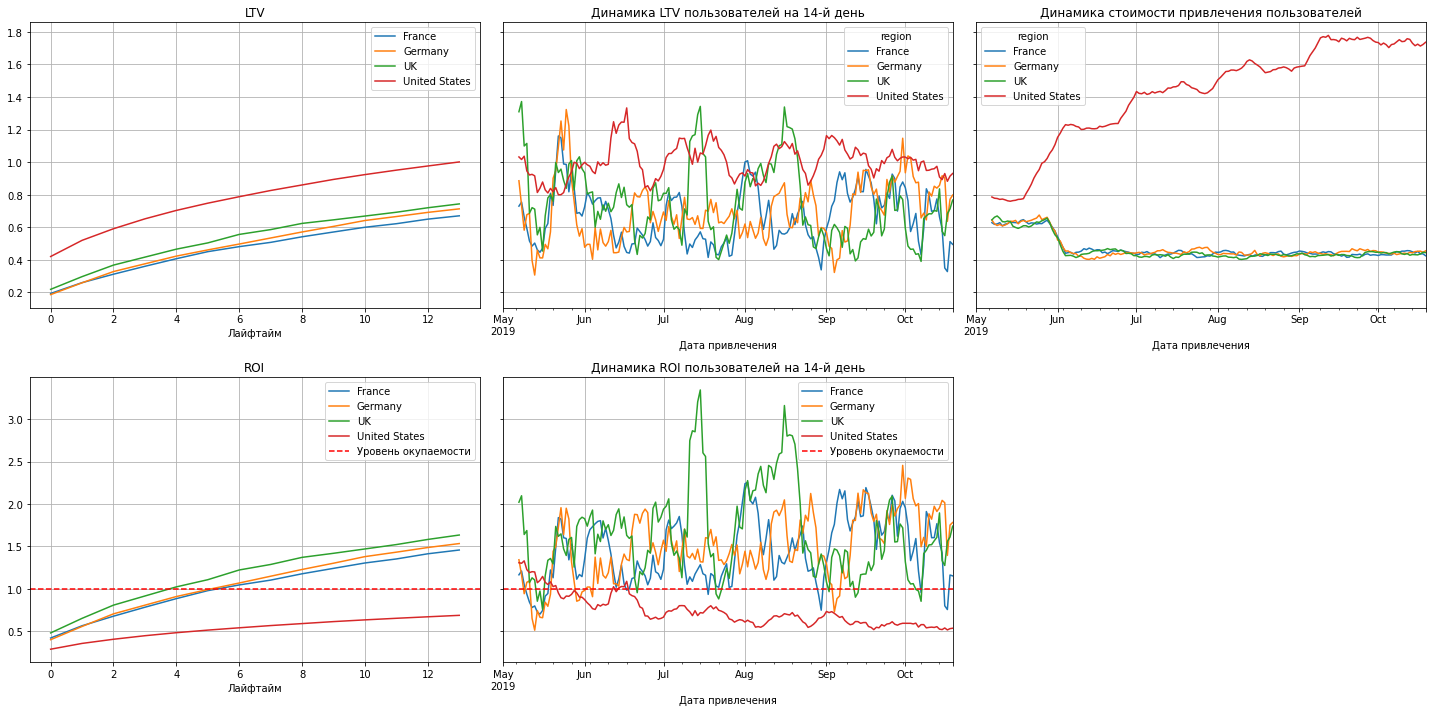

In [1051]:
ltv_raw_ctr, ltv_grouped_ctr, ltv_history_ctr, roi_grouped_ctr, roi_history_ctr = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['region'])

# строим графики
plot_ltv_roi(ltv_grouped_ctr, ltv_history_ctr, roi_grouped_ctr, roi_history_ctr, horizon_days)

В страновом разрезе, кривые LTV также растут, пользователи из США приносят больше ценности, но их стоимость резко подскочила к концу юиня и продолжала расти весь рассматриваемый период, возможно из-за колебаний валютного курса.Из-за этого по показателю RoI жители США оказались для компании убыточными, а лидировали англичане, немцы и французы. По форме кривой CaС, которая по форме совпадает с линий CaC канала TipTop, можно предположить, что это и были американцы.    
Из графика динамики RoI видно, что на 14 день "жизни" европейцы всегда приносили компании прибыль. Если бы удалось удержать цену одного пользователя из США на уровне значений в районе 0.6, то линия США не опустилась бы ниже линии безубыточности.  

В разбивке на континенты:

In [1052]:
#Добавление новой колонки в датасеты со значениями Europe и North America
ltv_raw_cont = ltv_raw_ctr.assign(
    continent = lambda row: row['region'].map(
        {'Germany': 'Europe', 
         'France': 'Europe', 
         'UK': 'Europe',
         'United States': 'North America'
        }
    ))
#________________________________________________________
ltv_grouped_cont = ltv_grouped_ctr.reset_index().assign(
    continent = lambda row: row['region'].map(
        {'Germany': 'Europe', 
         'France': 'Europe', 
         'UK': 'Europe',
         'United States': 'North America'
        })
)
ltv_grouped_cont = ltv_grouped_cont.groupby('continent').mean()
#_______________________________________________________
roi_grouped_cont = roi_grouped_ctr.reset_index().assign(
    continent = lambda row: row['region'].map(
        {'Germany': 'Europe', 
         'France': 'Europe', 
         'UK': 'Europe',
         'United States': 'North America'
        })
)
roi_grouped_cont = roi_grouped_cont.groupby('continent').mean()
#________________________________________________________
ltv_history_cont = ltv_history_ctr.reset_index().assign(
    continent = lambda row: row['region'].map(
        {'Germany': 'Europe', 
         'France': 'Europe', 
         'UK': 'Europe',
         'United States': 'North America'
        }
    ))
ltv_history_cont = ltv_history_cont.groupby(['continent','dt']).mean()
#________________________________________________________
roi_history_cont = roi_history_ctr.reset_index().assign(
    continent = lambda row: row['region'].map(
        {'Germany': 'Europe', 
         'France': 'Europe', 
         'UK': 'Europe',
         'United States': 'North America'
        }
    ))
roi_history_cont = roi_history_cont.groupby(['continent','dt']).mean()

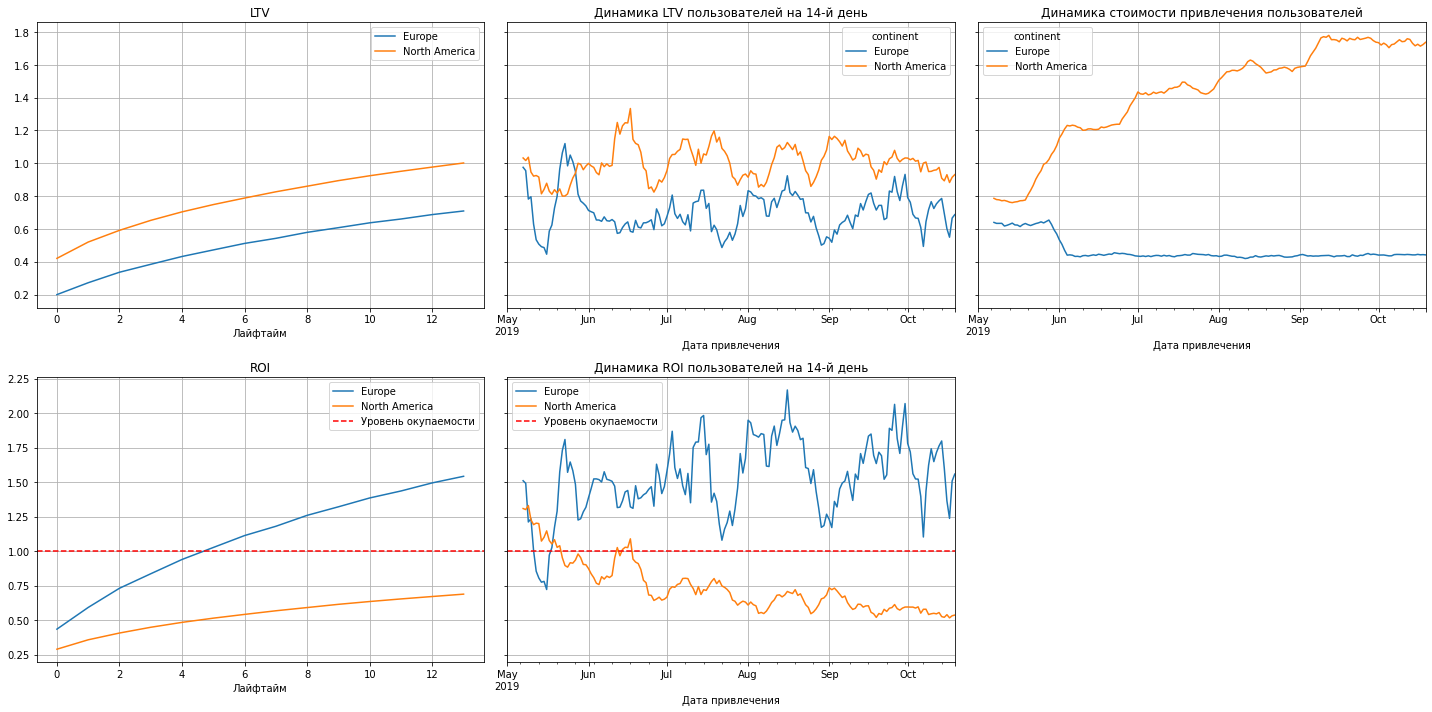

In [1053]:
plot_ltv_roi(ltv_grouped_cont, ltv_history_cont, roi_grouped_cont, roi_history_cont, horizon_days)

In [1054]:
print("-"*20,'LTV',"-"*20)
ltv_grouped_cont = ltv_grouped_cont.rename_axis('lifetime',axis = 1)[[1,6,13]].rename(columns={
    1.0:'LTV 2 день',
    6.0:'LTV 7 день',
    13.0:'LTV 14 день'}).sort_values('LTV 14 день',ascending=False)
display(ltv_grouped_cont)
print("-"*20,'ROI',"-"*20)
roi_grouped_cont = roi_grouped_cont.rename_axis('lifetime',axis = 1)[[1,6,13]].rename(columns={
    1.0:'ROI 2 день',
    6.0:'ROI 7 день',
    13.0:'ROI 14 день'}).sort_values('ROI 14 день',ascending=False)
display(roi_grouped_cont)

-------------------- LTV --------------------


lifetime,LTV 2 день,LTV 7 день,LTV 14 день
continent,,,
North America,0.519636,0.787655,1.001316
Europe,0.271801,0.511349,0.708926


-------------------- ROI --------------------


lifetime,ROI 2 день,ROI 7 день,ROI 14 день
continent,,,
Europe,0.591363,1.112456,1.541886
North America,0.356923,0.541018,0.687776


В этом разрезе видно, что значение LTV США больше, чем у Европы в целом: 1 против 0.7. И за рассматриваемый период оно не опускалось ниже отметки 0.8, в то в время как у Европы в нвчале и конце периода оно падало до примерно 0.5.  
За весь период CaC США вырос с 0.8 до почти 1.8, в то время как у Европы он снизился с 0.6 до почти 0.4.  
Это привело к тому, что в конечном итоге ROI Европы на 14 день равно 1.54, а у США 0.69

###  Выводы по рекламе  <a class="anchor" id="id_8d"></a>

1. Если рассматривать в общем, то реклама окупилась: маркетинговые расходы и доход равны 105497.3 и  169335.6 соответственно, RoI составил 1.6. 
2. Если же рассматривать с условием, что новые пользователи должны окупаться за две недели, то реклама не окупила свои расходы: на 14 день RoI равен 0.8.   
3. Основной причиной явились расходы на канал TipTop. Судя по данным графиков, пользователи этого канала - это преимущественно американцы и в большинстве - пользователи устройств от Apple. И хотя, по общему правилу, такие клиенты обычно имеют хорошую LTV, в данном случае  хорошие показатели RoI и LTV в мае- июне после роста цены их покупки с 24 июня привел к падению этих показателей и убыткам. Возможно, это было связано с ростом обменного курса валют в течение рассматриваемого периода.     
4. Также ошибочными были расходы на каналы AdNonSense и FaceBoom. Эти каналы имеют самую высокую долю платящих пользователей от численности канала: 11.34% и 12.20%, растущие кривые LTV, но завышенная стоимость одного пользователя привела к  их перманентной убыточности.В случае с ними надо пересматривать приемлемые цены покупки за одного пользователя:  0.70, 0.80 и 1.41 для соответсвенно AdNonSense, FaceBoom, TipTop.     
5. В разрезе устройств можно рассматривать пользователей PC как некий источник постоянного, пусть и низкого дохода. Их конверсия ниже, чем на других устройствах, но выше удержание и они приносят небольшую прибыль. Другие устройства принесли убытки от 10(для Android) до 30 (для iPhone,Mac) процентов от трат на рекламу.
6. В разрезе географии жители Европы стабильно приносят компании хороший RoI, поэтому можно рекомендовать меры по привлечению новых пользователей этой категории. A в случае с жителями США -  устанавливать приемлемые цены их покупки.  
7. Сильное падение удержания по каналам с платежеспособной и высоко конвертируемой аудиторией, прежде всего FaceBoom и AdNonSense свидетельствует о том, приложение мало удовлетворят потребностям этой категории посетителей.


## Вариант без TipTop <a class="anchor" id="id_9"></a>

Вариант profiles без TipTop:

In [1055]:
profiles_wo_tiptop = profiles[profiles['channel']!='TipTop']

Новые данные:

In [1056]:
ltv_raw_2, ltv_grouped_2, ltv_history_2, roi_grouped_2, roi_history_2 = get_ltv(
    profiles_wo_tiptop, orders, observation_date, horizon_days)

Старые и новые данные по RoI на конец второй недели жизни пользователя:

In [1057]:
display(roi_grouped_base[13],roi_grouped_2[13])

cohort
All users    0.806974
Name: 13.0, dtype: float64

cohort
All users    1.090776
Name: 13.0, dtype: float64

Как видно, без трат на TipTop компания не только бы отбила затраты на рекламу, но и получила бы прибыль в размере 9% от расходов.

## Исследование каналов FaceBoom и AdNonSense <a class="anchor" id="id_10"></a>

In [1058]:
ltv_raw_3 = ltv_raw_channel.query('channel=="FaceBoom" or channel=="AdNonSense"')
ltv_grouped_3 = ltv_grouped_channel.query('channel=="FaceBoom" or channel=="AdNonSense"') 
ltv_history_3 = ltv_history_channel.query('channel=="FaceBoom" or channel=="AdNonSense"') 
roi_grouped_3 = roi_grouped_channel.query('channel=="FaceBoom" or channel=="AdNonSense"') 
roi_history_3 = roi_history_channel.query('channel=="FaceBoom" or channel=="AdNonSense"')

In [1059]:
start = min_date
end = ltv_raw_3['dt'].max() 
print(end)

2019-10-19


Статистика по FaceBoom с 2019 -05-01 по 2019-10-19:

In [1060]:
r = roi_history_3.reset_index().query('channel=="FaceBoom"')[['dt','cohort_size','cac',13]]
l = ltv_history_3.reset_index().query('channel=="FaceBoom"')[['dt','cohort_size',13]]
l = l.merge(r[['dt','cac',13]], on=['dt']).rename(columns = {'13.0_x':'ltv','13.0_y':'roi'})
display(l.describe())

,cohort_size,ltv,cac,roi
count,172.000000,172.000000,172.000000,172.000000
mean,160.139535,0.820056,1.112934,0.737053
std,45.555997,0.211972,0.018456,0.191048
min,72.000000,0.339456,1.052688,0.298445
25%,125.750000,0.680196,1.100000,0.605833
50%,156.500000,0.796379,1.114816,0.719155
75%,195.000000,0.940014,1.125421,0.846526
max,264.000000,1.420732,1.183544,1.291574


Статистика по AdNonSense с 2019 -05-01 по 2019-10-19:

In [1061]:
r = roi_history_3.reset_index().query('channel=="AdNonSense"')[['dt','cohort_size','cac',13]]
l = ltv_history_3.reset_index().query('channel=="AdNonSense"')[['dt','cohort_size',13]]
l = l.merge(r[['dt','cac',13]], on=['dt']).rename(columns = {'13.0_x':'ltv','13.0_y':'roi'})
display(l.describe())

,cohort_size,ltv,cac,roi
count,172.000000,172.000000,172.000000,172.000000
mean,21.523256,0.862690,1.010280,0.856844
std,9.705279,0.759727,0.076928,0.766502
min,7.000000,0.000000,0.787500,0.000000
25%,15.000000,0.350488,0.975000,0.359040
50%,19.000000,0.702956,1.001718,0.678912
75%,25.250000,1.188095,1.050000,1.188095
max,54.000000,4.440556,1.312500,4.757738


Можно предположить, если бы у канала FaceBoom CaC  был бы равен или меньше медианного LTV (0.79), а у AdNonSense меньше или равен 0.70, то эти каналы не были бы убыточными.

## Выводы <a class="anchor" id="id_100"></a>

1. Количество пользователей приложения составило 150008 человек. Преимущественно это жители США (100тыс. человек), а также Великобритании (17575), Франции(17450) и Германии(14981). Доля платящих посетителей составила 6%.  
2. По количеству заплативших пользователей лидируют США (6902 человека или 7% от численности посетителей из США).   
3. Больше всего пользователей айфонов (54479 или 36% от общего числа), затем идут пользователи на Android(35032 и 23% соотв.). Пользователей PC и макбуков примерно одинаково (30тыс или 20% от общего числа). По доле платящих лидируют посетители на макбуках и айфонах (6.3% и 6.2%), затем на Android и PC(5.8% и 5%).  
4.  Расходы на рекламу за рассматриваемый период с 2019-05-01 по 2019-10-27 составили 105497.3, доходы 169335.6. Больше всего потратили на каналы TipTop (52% от общей суммы) и Faceboom (30.75%). Доля остальных каналов не превышает 5% для каждого.
5. Доход с пользователей не окупает расходы на рекламу за первые две недели жизни нового пользователя. Причиной этого является неправильный выбор каналов покупки пользователей, прежде всего TipTop, а также AdNonSense и FaceBoom. В случае с ними надо пересматривать приемлемые цены покупки за одного пользователя:  0.70, 0.80 и 1.41 для соответсвенно AdNonSense, FaceBoom, TipTop.  
6. Можно рекомендовать меры по увеличению числа пользователей на PС в качестве источника постоянного низкого дохода. То, что их удержание больше, чем на других платформах свидетельствует о том, что функционал приложения более удовлетворяет  их потребностям.  
7. Можно рекомендовать меры по привлечению новых пользователей из Европы. A в случае с жителями США - пересмотреть допустимые цены их покупки.  
8. Следует пересмотреть функционал приложения, чтобы он больше удовлетворял запросам посетителям с каналов FaceBoom и AdNonSense.
9. Рекомендую привлекать больше посетителей из канала  lambdaMediaAds, он обладает конверсией более 10% и RoI 2.4, но численность канала меньше 2% от общей.
9. Рекомендую улучшить конверсию и  привлекать больше посетителей из каналов YRabbit, MediaTornado, ,LeapBob, RocketSuperAds. Они показывают хорошую статистику (RoI больше 2) при маленькой конверсии (на уровне 3%), но их численность в общей массе очень маленькая и слабо влияет на общие показатели. 